Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing /content/drive/MyDrive/Colab Notebooks/dataset/Vocal Acoustic/vocal_acoustic_000-050-025.wav...


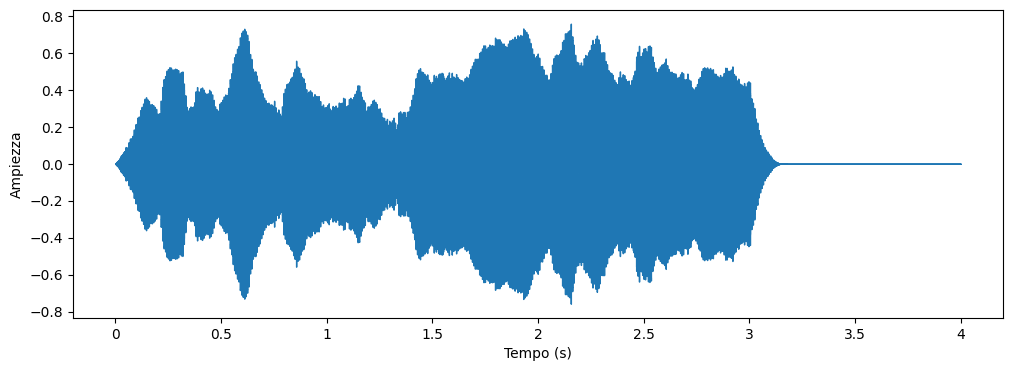

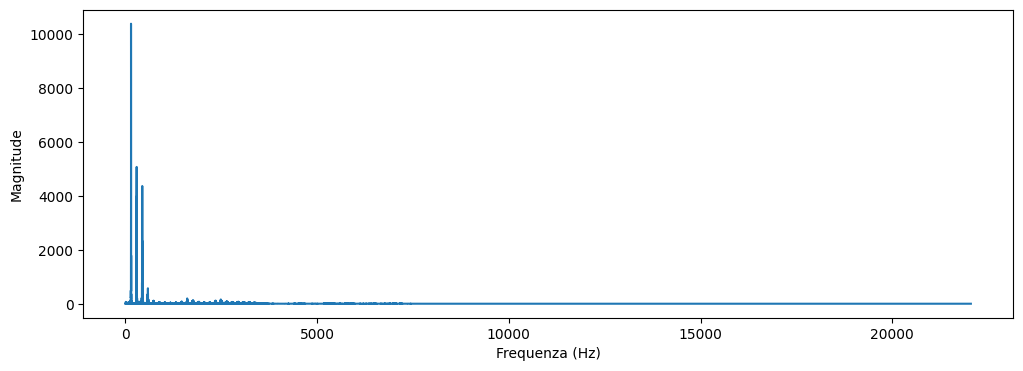

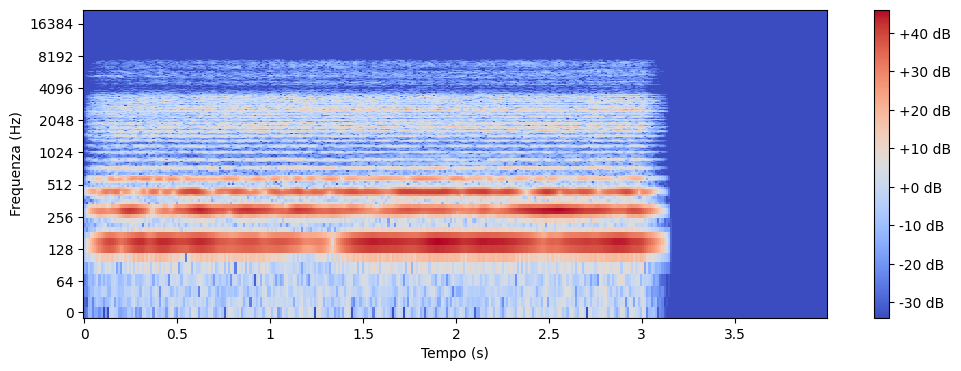

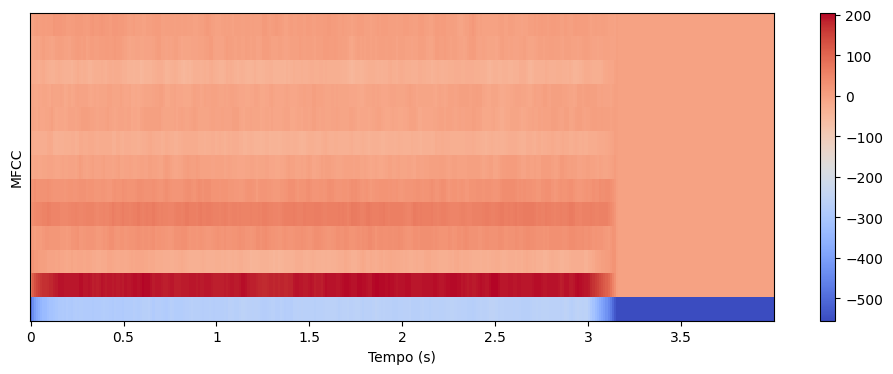

Processing /content/drive/MyDrive/Colab Notebooks/dataset/Vocal Acoustic/vocal_acoustic_000-065-100.wav...


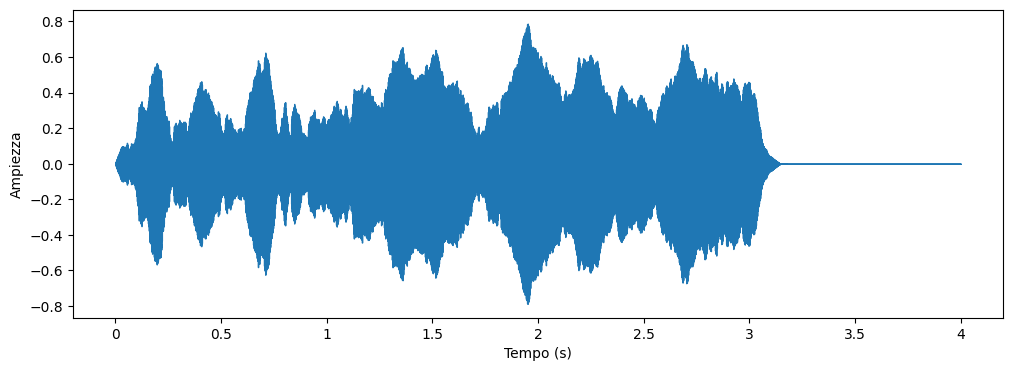

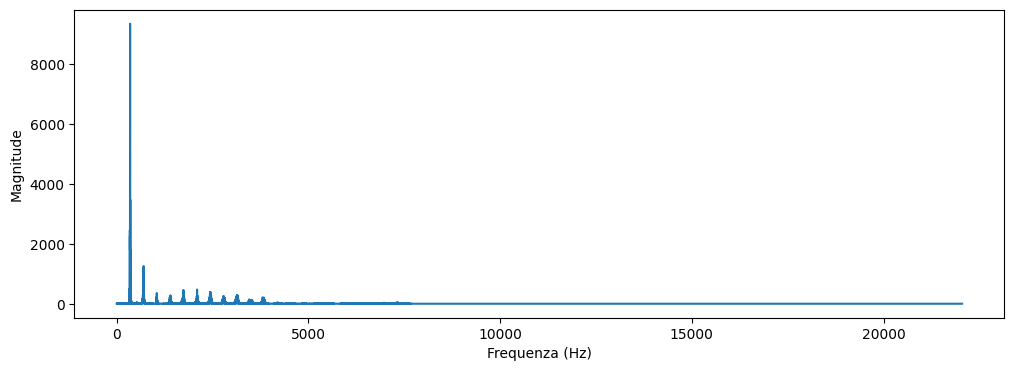

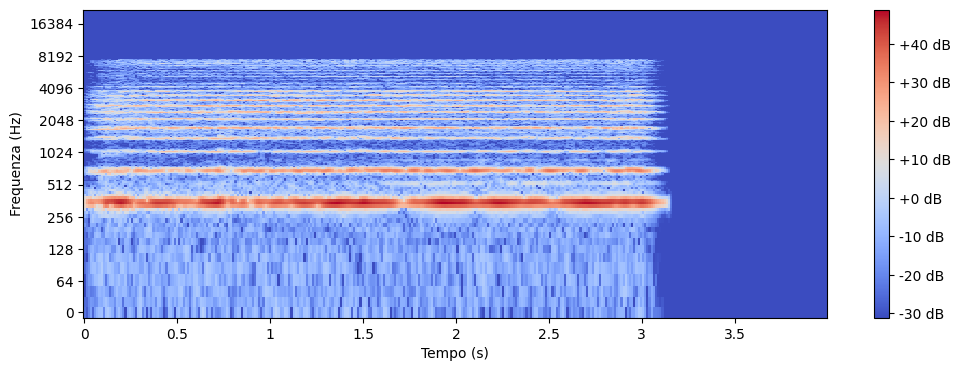

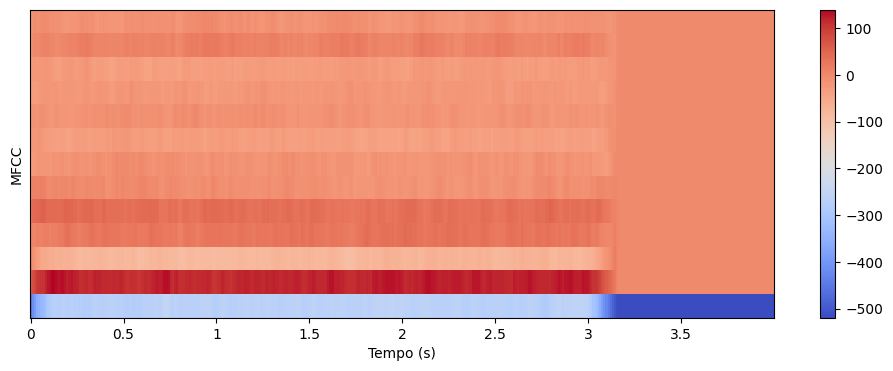

Processing /content/drive/MyDrive/Colab Notebooks/dataset/Vocal Acoustic/vocal_acoustic_000-064-127.wav...


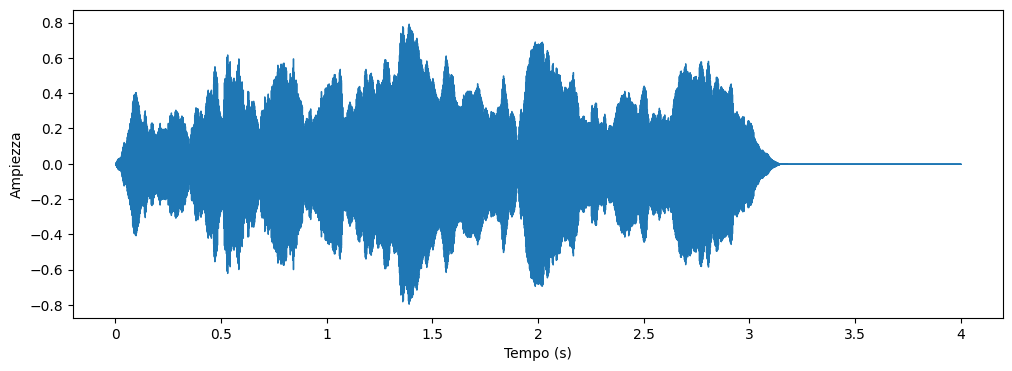

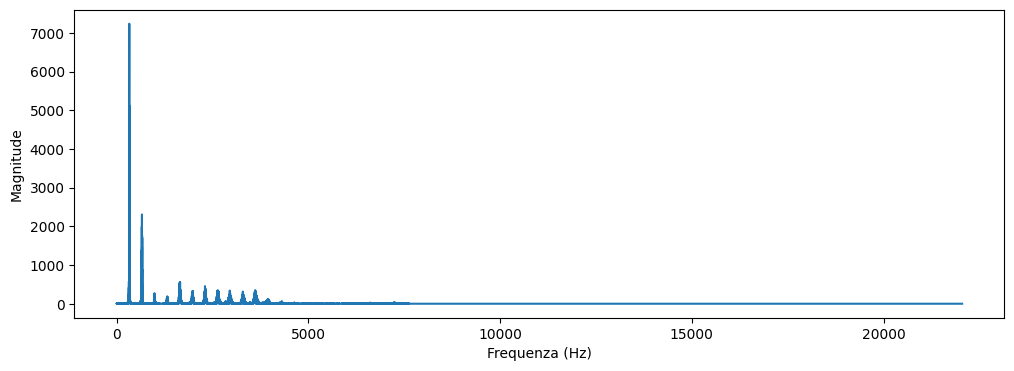

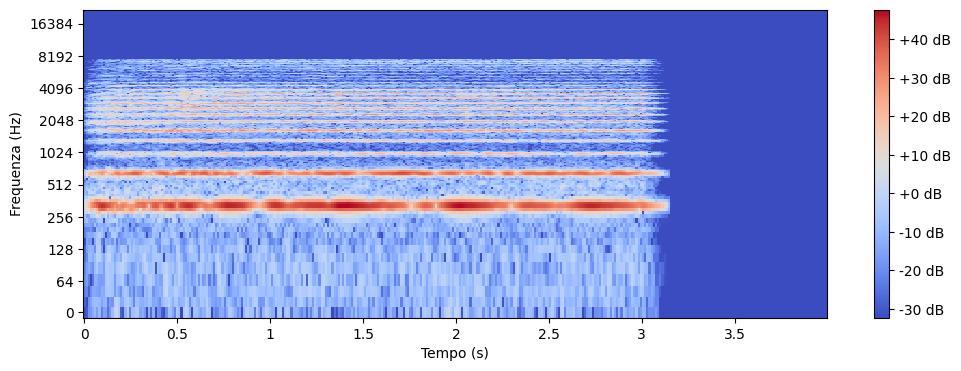

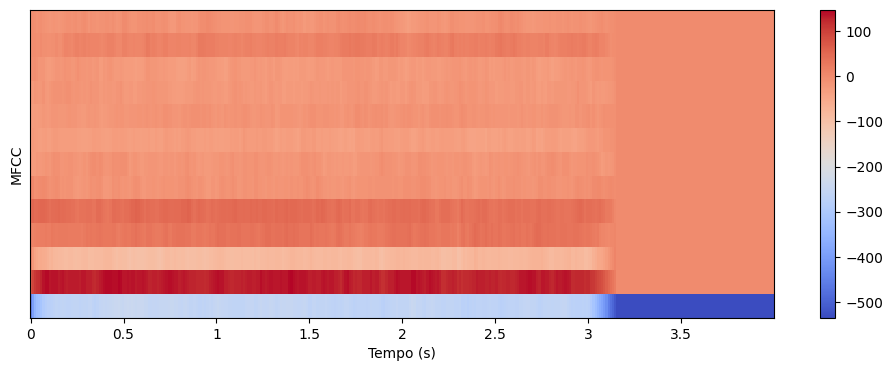

Processing /content/drive/MyDrive/Colab Notebooks/dataset/Vocal Acoustic/vocal_acoustic_000-060-075.wav...


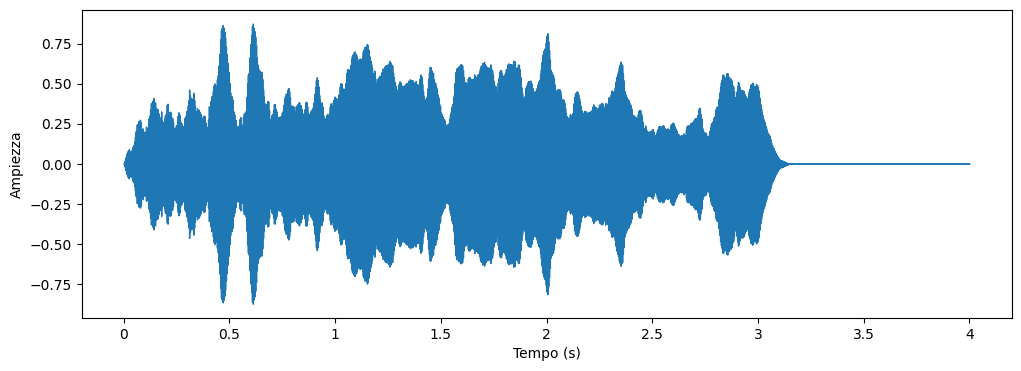

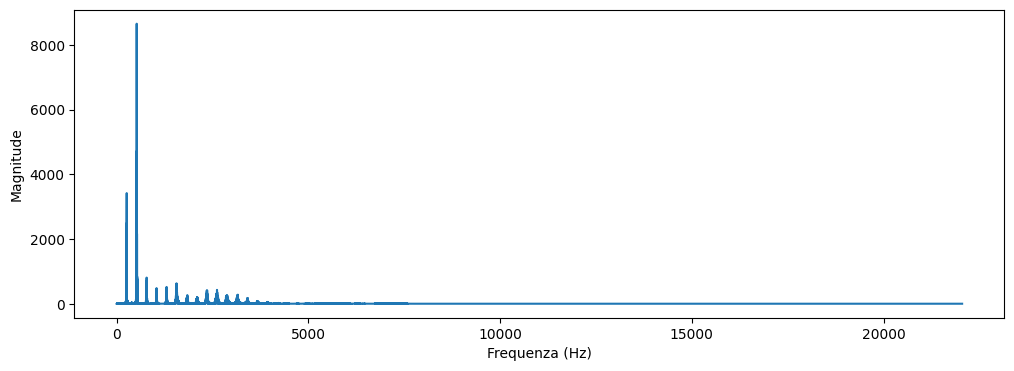

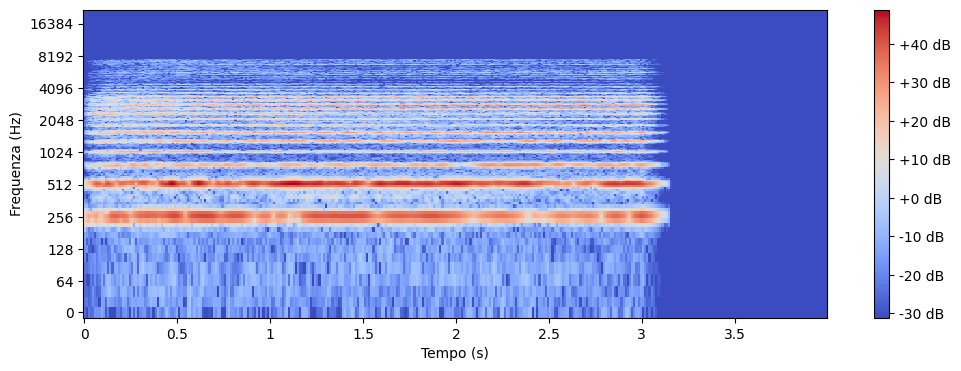

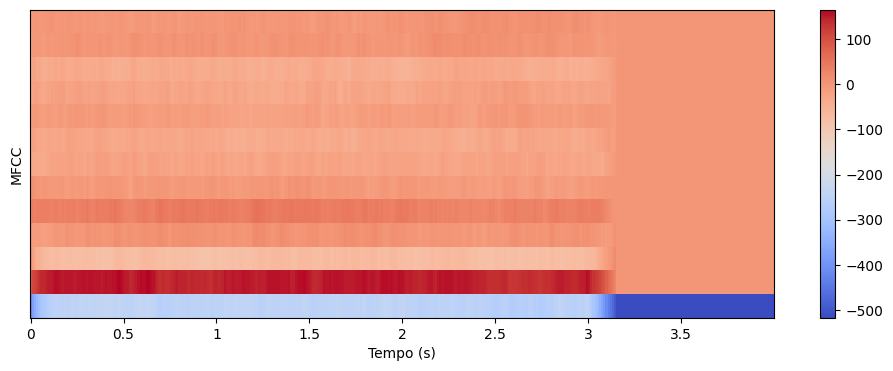

Processing /content/drive/MyDrive/Colab Notebooks/dataset/Vocal Acoustic/vocal_acoustic_000-069-050.wav...


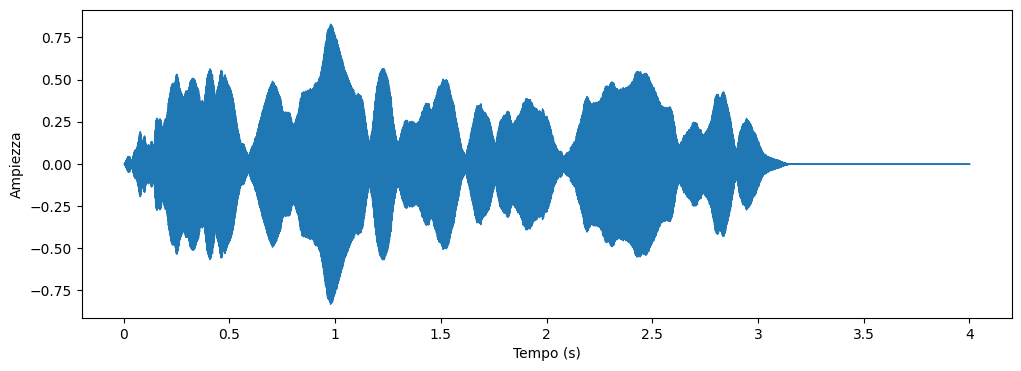

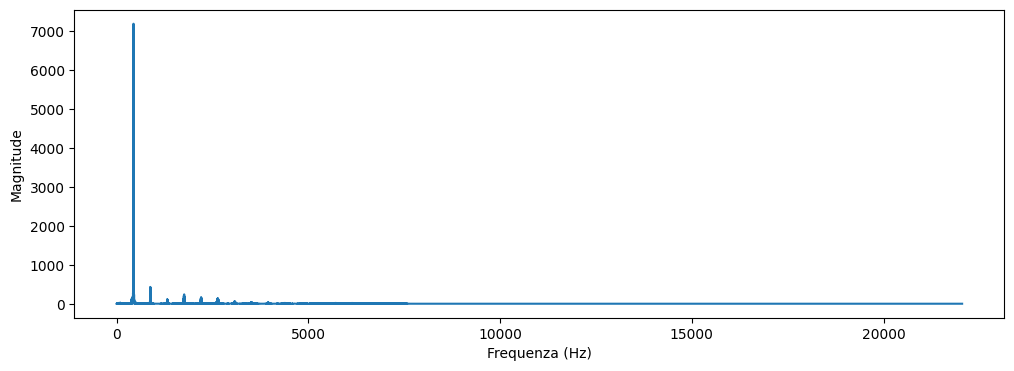

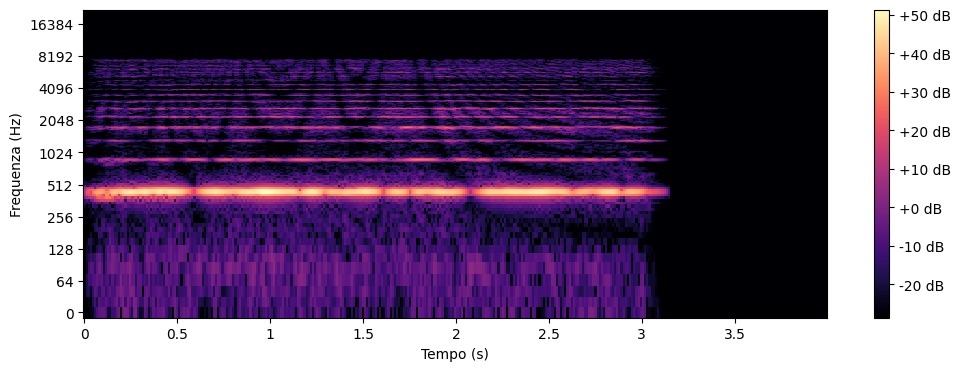

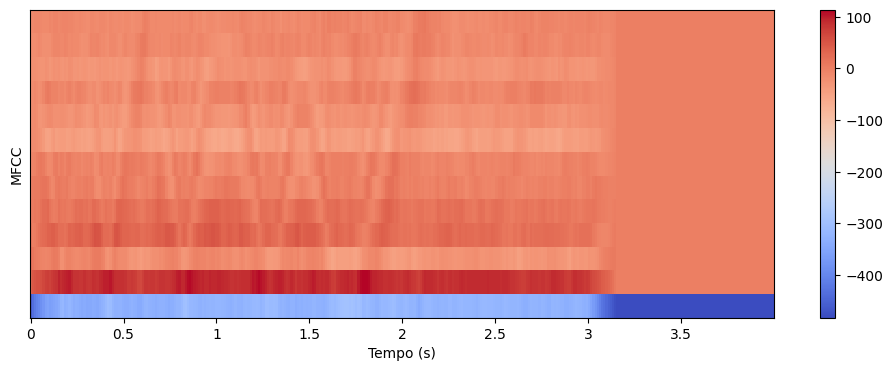

Processing /content/drive/MyDrive/Colab Notebooks/dataset/Vocal Acoustic/vocal_acoustic_000-067-075.wav...


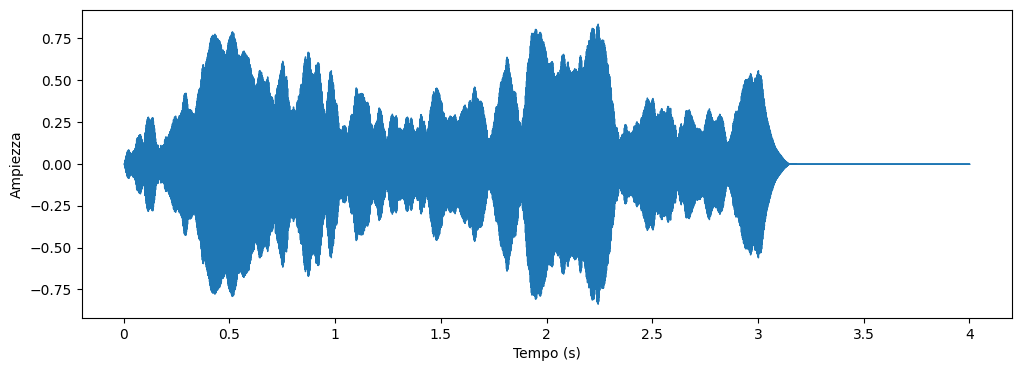

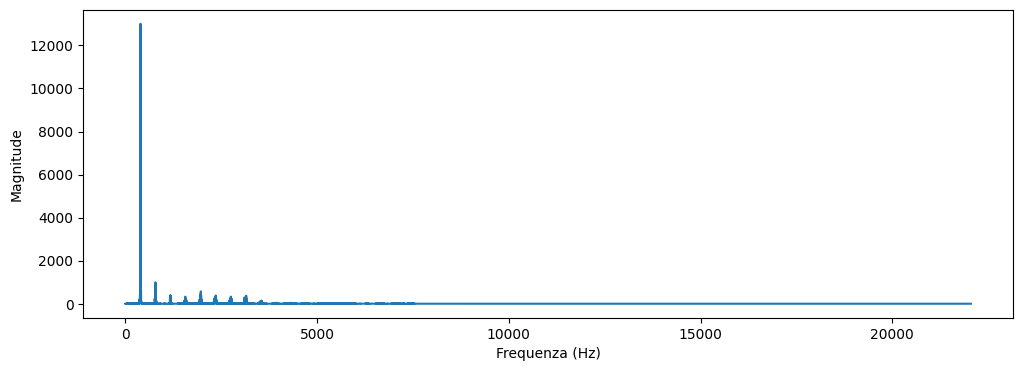

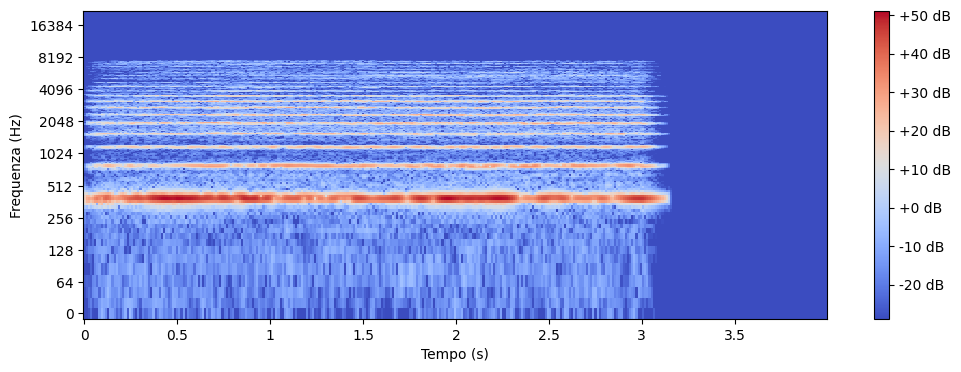

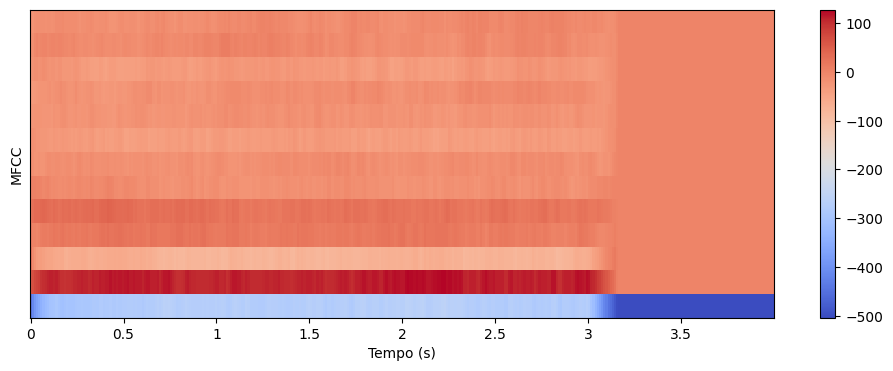

Processing /content/drive/MyDrive/Colab Notebooks/dataset/Vocal Acoustic/vocal_acoustic_000-057-025.wav...


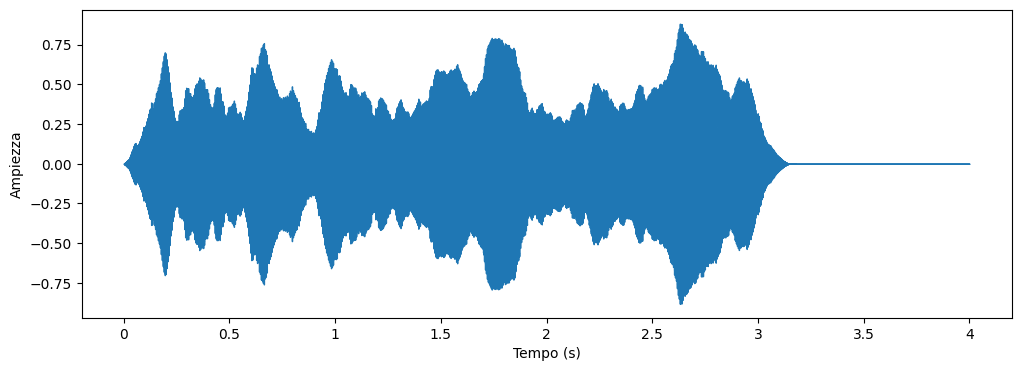

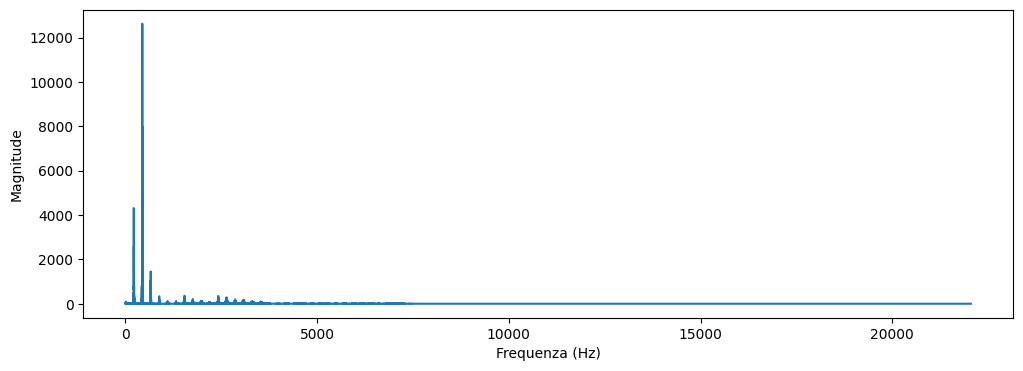

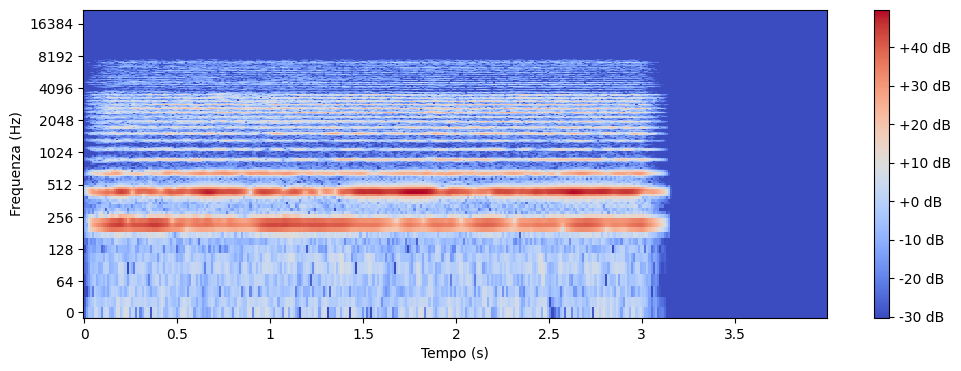

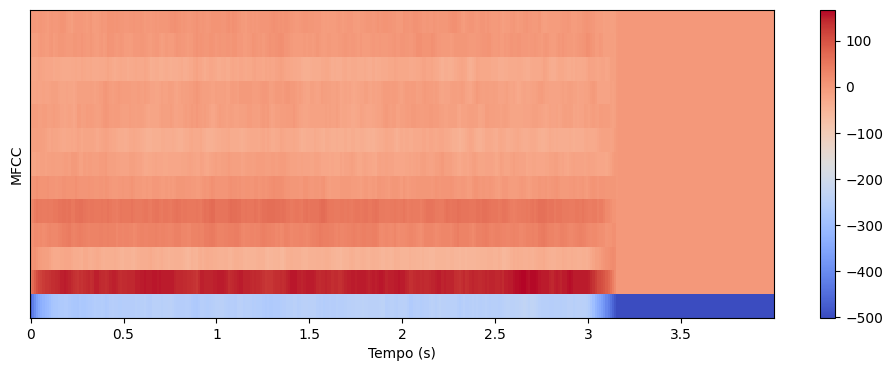

Processing /content/drive/MyDrive/Colab Notebooks/dataset/Vocal Acoustic/vocal_acoustic_000-059-127.wav...


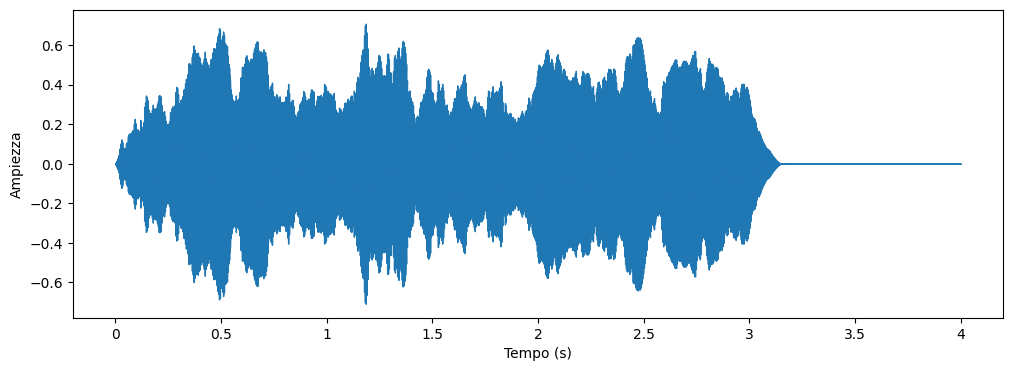

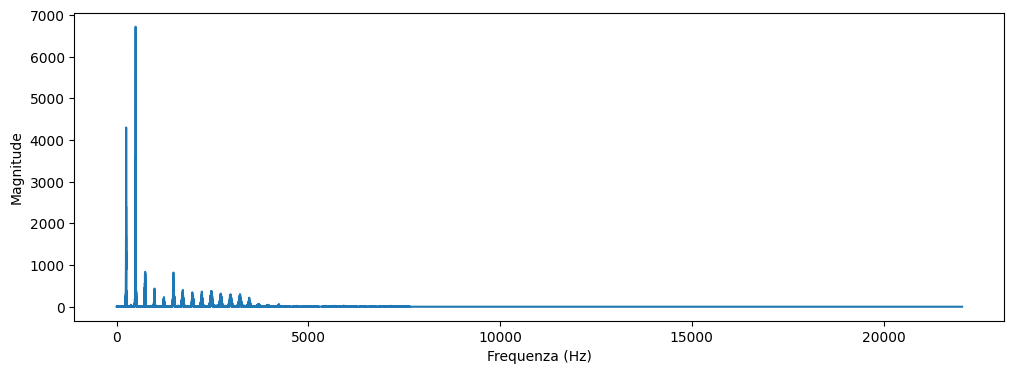

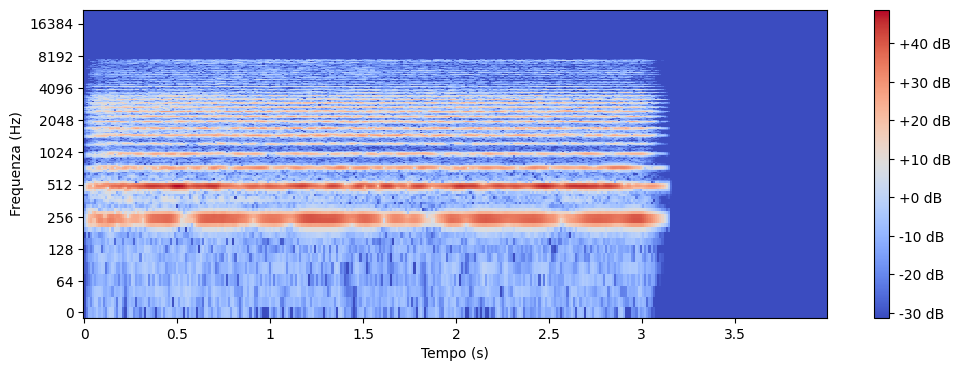

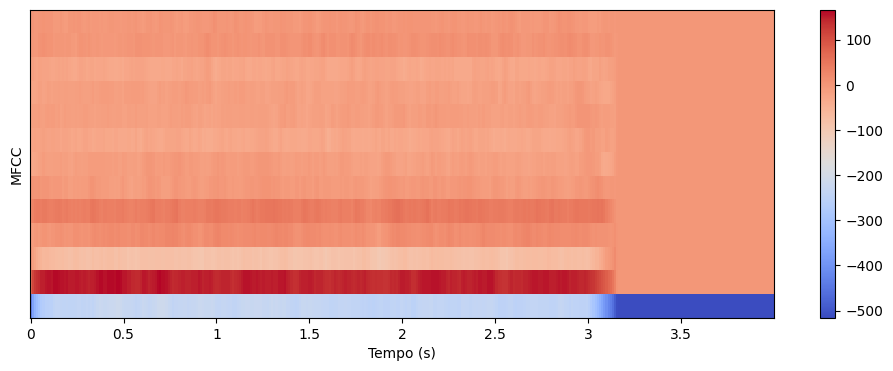

Processing /content/drive/MyDrive/Colab Notebooks/dataset/Vocal Acoustic/vocal_acoustic_000-056-025.wav...


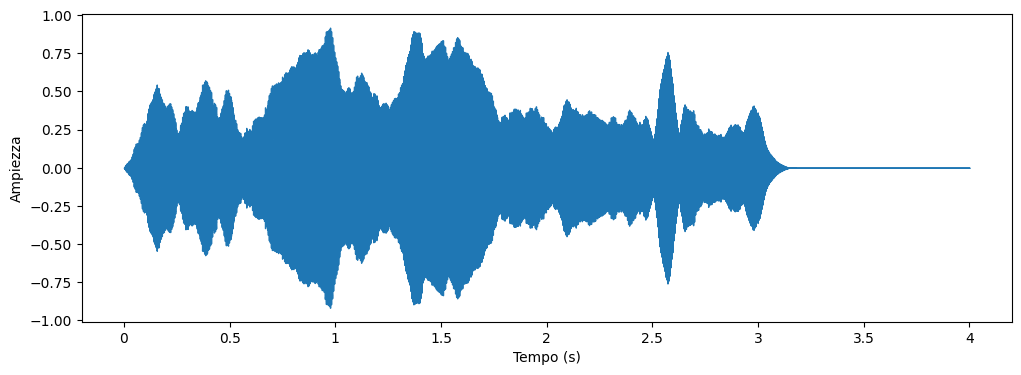

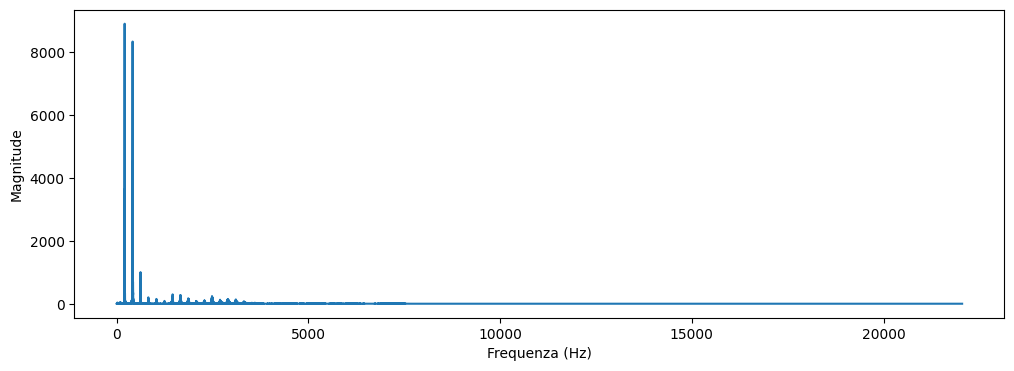

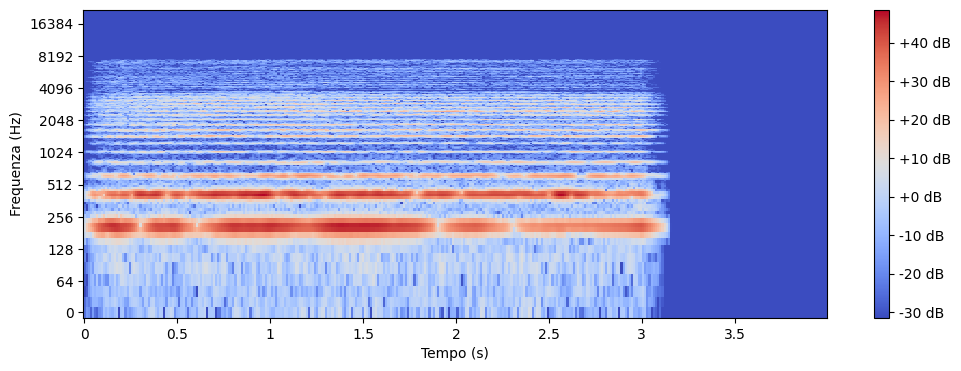

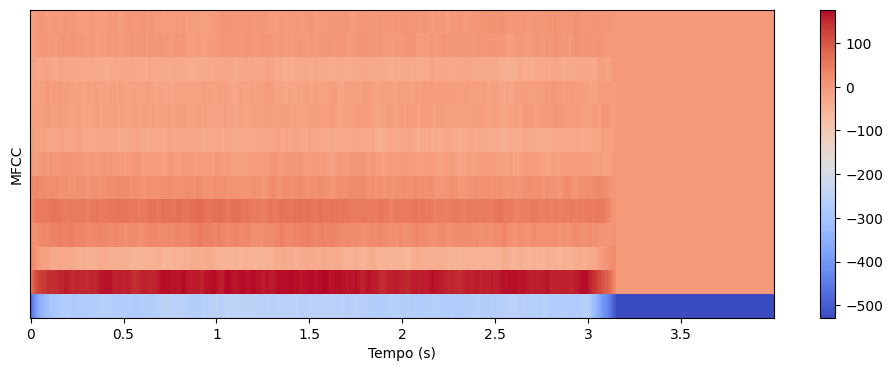

Processing /content/drive/MyDrive/Colab Notebooks/dataset/Vocal Acoustic/vocal_acoustic_000-058-127.wav...


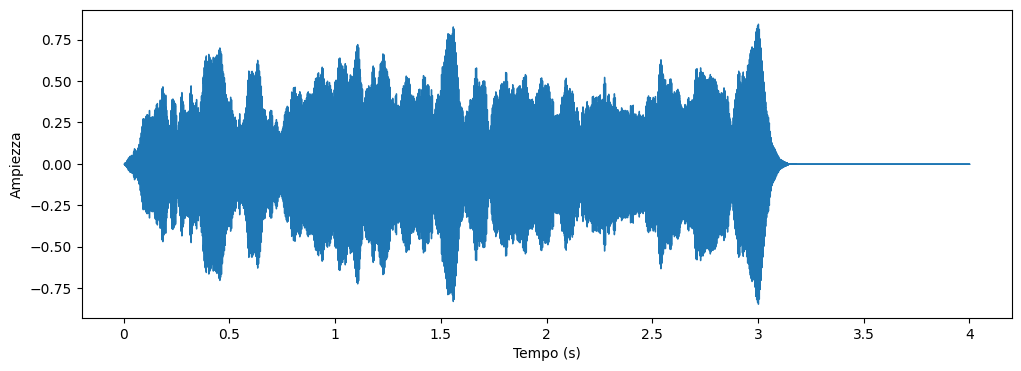

KeyboardInterrupt: 

In [ ]:
import soundfile as sf
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive')

# Percorso al dataset
DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/dataset/"
OUTPUT_JSON = "/content/drive/MyDrive/Colab Notebooks/dataset/data.json"

def process_file(file_path):
    # Carica il file audio
    signal, sr = librosa.load(file_path, sr=44100)

    # Visualizzazione del segnale audio
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(signal, sr=sr)
    plt.xlabel("Tempo (s)")
    plt.ylabel("Ampiezza")
    plt.show()

    # FFT e spettro delle frequenze
    ft = np.fft.fft(signal)
    magnitude = np.abs(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]

    plt.figure(figsize=(12, 4))
    plt.plot(left_frequency, left_magnitude)
    plt.xlabel("Frequenza (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

    # Calcolo e visualizzazione dello spettrogramma
    n_fft = 2048
    hop_length = 512
    stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Frequenza (Hz)")
    plt.show()